In [29]:
# imports
# add folder to syspath to import GeneticAlgorithm 
import os
import numpy as np
import sys
path = os.path.dirname(os.path.dirname(os.path.abspath('')))
sys.path.insert(0, path+'/GeneticAlgorithm')
from GeneticAlgorithm import GeneticAlgorithm

# add folder to syspath to import ParticleSwarmOptimization
sys.path.insert(0, os.path.dirname(path)+'/ParticleSwarmOptimization')
 # add folder to syspath to import ACO 
sys.path.insert(0, os.path.dirname(path)+'/AntColonyOptimization')

import numpy as np
from matplotlib import pyplot as plt
# lade die Probleme
# small problem
small_objects  = np.load(os.path.join(path,'Compare/Ressources/betterproblem/small_objects.npy'))
small_container = np.load(os.path.join(path,'Compare/Ressources/betterproblem/small_container.npy'))
small_optimal_solution = np.load(os.path.join(path, 'Compare/Ressources/betterproblem/small_optimal.npy'))
# medium Problem
medium_objects= np.load(os.path.join(path,'Compare/Ressources/betterproblem/medium_objects.npy'))
medium_container = np.load(os.path.join(path,'Compare/Ressources/betterproblem/medium_container.npy'))
medium_optimal_solution = np.load(os.path.join(path, 'Compare/Ressources/betterproblem/medium_optimal.npy'))
# large Problem
large_objects  = np.load(os.path.join(path,'Compare/Ressources/betterproblem/large_objects.npy'))
large_container = np.load(os.path.join(path,'Compare/Ressources/betterproblem/large_container.npy'))
large_optimal_solution = np.load(os.path.join(path, 'Compare/Ressources/betterproblem/large_optimal.npy'))

# load new Problem
new_medium_objects= np.load(os.path.join(path,'Compare/new_medium1-100.npy'))
#resize
new_medium_objects.shape = (250,2)
#medium_container = np.load(os.path.join(path,'Ressources/newproblem/new_medium1-100.npy'))
new_medium_container = np.array([100,100])

print('Optimale Lösungen')
print(f'Kleines Problem {small_optimal_solution}')
print(f'Medium Problem {medium_optimal_solution}')
print(f'Großes Problem {large_optimal_solution}')

Optimale Lösungen
Kleines Problem 3
Medium Problem 16
Großes Problem 35


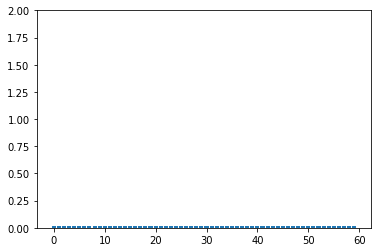

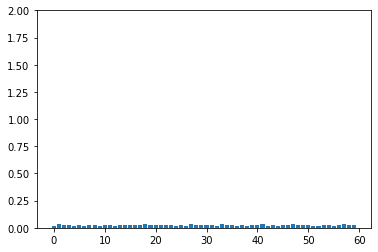

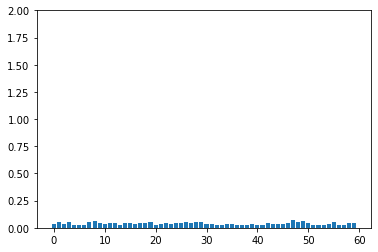

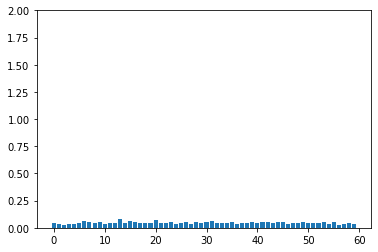

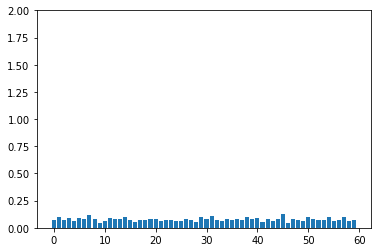

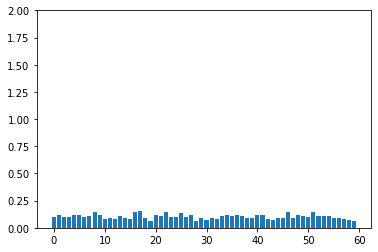

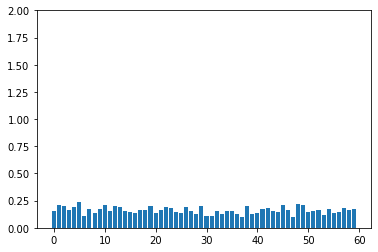

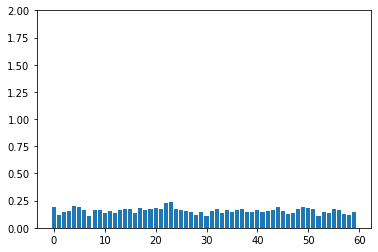

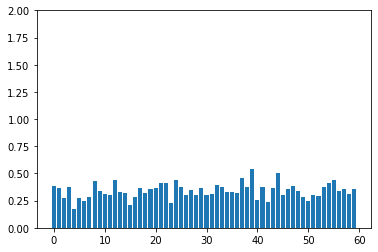

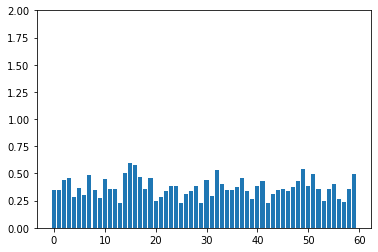

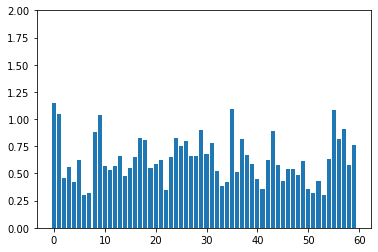

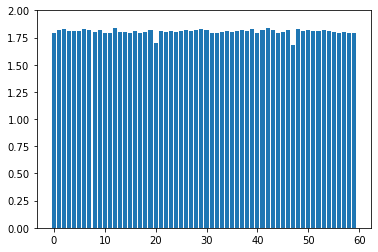

In [33]:
av_number = 10
number_generations = 50
pop_size = 60
crossover_prob = 0.7
mutation_prob = 0.01
fit_heuristic = 'first_fit'
amount_obj = len(medium_objects)
objects = medium_objects
container_vol = medium_container[0]
container_weight = medium_container[1]

from GeneticAlgorithm import Chromosome
gens = [1,3,5,7,9,11,13, 15,17,19,21,25]
fig = [None] * len(gens)
ax = [None] * len(gens)
for i,generation in enumerate(gens):
    GA = GeneticAlgorithm(objects, pop_size, container_vol, container_weight, crossover_prob, mutation_prob, generation, 'fill', fit_heuristic)
    solution ,_, _, _,_,_ = GA.run()
    fitness_vals = np.zeros(len(solution.current_members))
    for index,member in enumerate(solution.current_members):
        fitness_vals[index] = Chromosome.fitness_fill(member)
    fig[i], ax[i] = plt.subplots(1)
    ax[i].set_ylim([0,2])
    x_vals = np.arange(len(solution.current_members))
    ax[i].bar(x_vals, fitness_vals)
plt.show() 
